In [8]:
import numpy as np

from keras.models import load_model

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr,spearmanr

In [5]:
model = load_model("/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_gosselin_microglia/model_7.hdf5", compile=False)

In [6]:
X = np.load("/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_gosselin_microglia/chr8_9_summit_centered_test_set_X.npy")

In [7]:
Ypred = model.predict(X)

In [9]:
Y = np.load("/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_gosselin_microglia/chr8_9_summit_centered_test_set_Y.npy")

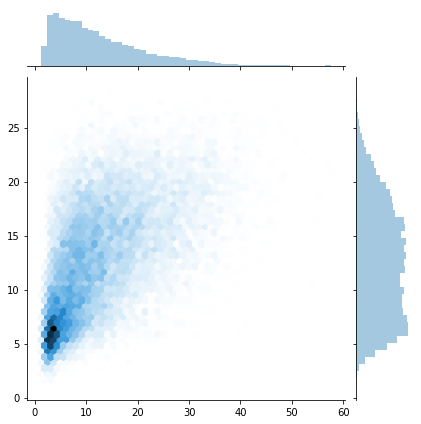

In [17]:
sns.jointplot(x=Y, y=Ypred, kind='hex')

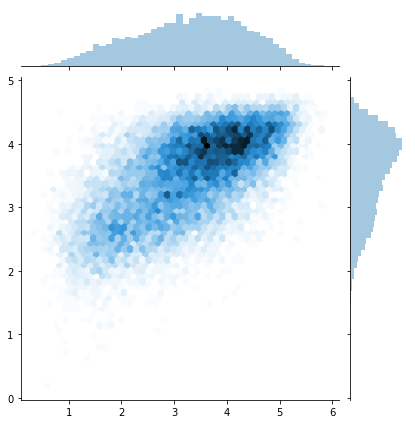

In [12]:
sns.jointplot(x=np.log2(Y), y=np.log2(Ypred), kind='hex')

In [13]:
pearsonr(Ypred,Y)

(array([0.56686588]), array([0.]))

In [14]:
spearmanr(Ypred,Y)

SpearmanrResult(correlation=0.6100512673280452, pvalue=0.0)

In [15]:
pearsonr(np.log2(Ypred),np.log2(Y))

(array([0.62769164]), array([0.]))

In [16]:
spearmanr(np.log2(Ypred),np.log2(Y))

SpearmanrResult(correlation=0.6100513121968454, pvalue=0.0)